In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()


In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [23]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [24]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]


In [27]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


Text(0, 0.5, 'sepal width (cm)')

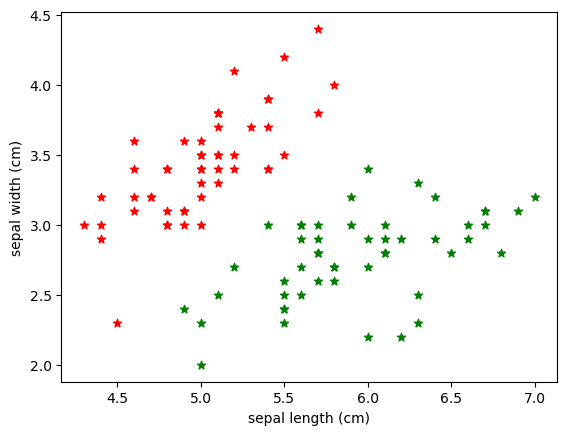

In [35]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',marker='*')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

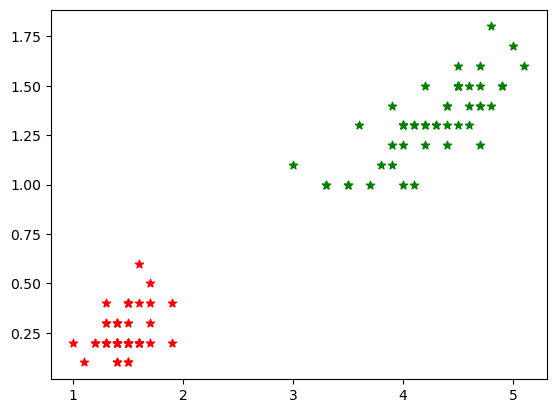

In [36]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red',marker='*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',marker='*')

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x=df.drop(['target','flower_name'],axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
y=df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [46]:
len(x_train)

120

In [47]:
len(x_test)

30

In [64]:
from sklearn.svm import SVC
model=SVC(C=2)
model.fit(x_train,y_train)

SVC(C=2)

In [65]:
model.score(x_test,y_test)

1.0

In [66]:
from sklearn.metrics import classification_report,accuracy_score
pre=model.predict(x_test)
print(accuracy_score(y_test,pre)*100)
print(classification_report(y_test,pre))


100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

